In [167]:
#All libraries used...
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# [Q1.] Solving x = $e^{-x}$ via Fixed Point Method

In [162]:
G = lambda x : np.exp(-x) #function definition

def fixed_point(iterations,t, init_guess):
    X = np.zeros(iterations)
    X[0] = init_guess
    for i in range(iterations):
        if i == iterations-1:
            print("Max iterations exceeded")
            break
        
        X[i+1] = G(X[i])

        if abs(X[i+1]-X[i])>t:
            continue
        
        else:
           # break
            return X[i+1]
        
print("Converges at :",fixed_point(100,0.0001,2))

Converges at : 0.5671749394606749


# [Q2.] Numerically Integrating $\int_0^1\sqrt{1+x^4}$ dx using **Simpson's Rule** and **Gaussian Quadrature**

In [163]:
I = lambda x : (1+x**4)**0.5 #Integrand

#simpson's rule...
# Python code for simpson's 1 / 3 rule 
import math


# Function for approximate integral
def simpsons_( ll, ul, n ):

	# Calculating the value of h
	h = ( ul - ll )/n

	# List for storing value of x and f(x)
	x = list()
	fx = list()
	
	# Calculating values of x and f(x)
	i = 0
	while i<= n:
		x.append(ll + i * h)
		fx.append(I(x[i]))
		i += 1

	# Calculating result
	res = 0
	i = 0
	while i<= n:
		if i == 0 or i == n:
			res+= fx[i]
		elif i % 2 != 0:
			res+= 4 * fx[i]
		else:
			res+= 2 * fx[i]
		i+= 1
	res = res * (h / 3)
	return res
	
# Driver code
lower_limit = 0 # Lower limit
upper_limit = 1 # Upper limit
n = 10 # Number of interval
print("The integral value (via Simpson's) is :","%.6f"% simpsons_(lower_limit, upper_limit, n))









#Guassian Quadrature...

# Gauss-Legendre nodes and weights for 5-point quadrature
nodes = np.array([-0.906179845938664, -0.538469310105683, 0, 0.538469310105683, 0.906179845938664])
weights = np.array([0.236926885056189, 0.478628670499366, 0.568888888888889, 0.478628670499366, 0.236926885056189])



a = 0
b = 1

integral = np.sum(weights * I((b-a)/2 * nodes + (a+b)/2)) * (b - a) / 2

print("The integral value (via Guassian Quadrature) is :", integral)







The integral value (via Simpson's) is : 1.089429
The integral value (via Guassian Quadrature) is : 1.0894298875474304


# [Q3.] Solving ODE using RK4

In [164]:
import numpy as np
import pandas as pd

dydx = lambda x, y: (5*x**2 - y)/(np.exp(x+y))

def rungeKutta(x0, y0, x, h):
    # Number of iterations using step size h
    n = int((x - x0) / h) 
    
    result = [(x0, y0)]
    
    y = y0
    for i in range(1, n + 1):
        k1 = h * dydx(x0, y)
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x0 + h, y + k3)

        # Update next value of y
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

        # Update next value of x
        x0 = x0 + h
        
        result.append((x0, y))
    return result


print("For h = 0.5")
x0 = 0
y = 1
x = 2
h = 0.5
results = rungeKutta(x0, y, x, h)

df = pd.DataFrame(results, columns=['x', 'y'])
print(df)


print("For h = 0.2")
x0 = 0
y = 1
x = 2
h = 0.2
results = rungeKutta(x0, y, x, h)

df = pd.DataFrame(results, columns=['x', 'y'])


print(df)


print("For h = 0.05")
x0 = 0
y = 1
x = 2
h = 0.05
results = rungeKutta(x0, y, x, h)

df = pd.DataFrame(results, columns=['x', 'y'])

print(df)


print("For h = 0.01")
x0 = 0
y = 1
x = 2
h = 0.01
results = rungeKutta(x0, y, x, h)

df = pd.DataFrame(results, columns=['x', 'y'])

print(df)


For h = 0.5
     x         y
0  0.0  1.000000
1  0.5  0.913193
2  1.0  1.071926
3  1.5  1.349783
4  2.0  1.619126
For h = 0.2
      x         y
0   0.0  1.000000
1   0.2  0.937797
2   0.4  0.910445
3   0.6  0.926711
4   0.8  0.983812
5   1.0  1.071586
6   1.2  1.177827
7   1.4  1.291957
8   1.6  1.406358
9   1.8  1.516227
10  2.0  1.618896
For h = 0.05
       x         y
0   0.00  1.000000
1   0.05  0.982134
2   0.10  0.965583
3   0.15  0.950700
4   0.20  0.937796
5   0.25  0.927131
6   0.30  0.918918
7   0.35  0.913318
8   0.40  0.910442
9   0.45  0.910352
10  0.50  0.913060
11  0.55  0.918535
12  0.60  0.926706
13  0.65  0.937466
14  0.70  0.950679
15  0.75  0.966185
16  0.80  0.983805
17  0.85  1.003352
18  0.90  1.024628
19  0.95  1.047435
20  1.00  1.071578
21  1.05  1.096866
22  1.10  1.123115
23  1.15  1.150154
24  1.20  1.177820
25  1.25  1.205963
26  1.30  1.234447
27  1.35  1.263147
28  1.40  1.291950
29  1.45  1.320756
30  1.50  1.349476
31  1.55  1.378031
32  1.60  1.406352

# [Q4.] Solving 1d Heat Equation using **Crank-Nicholson**

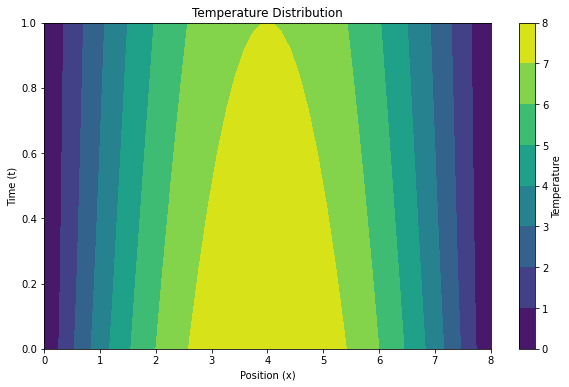

     0.00      0.16      0.33      0.49      0.65      0.82      0.98  \
0.0   0.0  0.639733  1.252811  1.839234  2.399000  2.932112  3.438567   
0.0   0.0  0.639170  1.251819  1.838234  2.398000  2.931112  3.437567   
0.0   0.0  0.638611  1.250842  1.837234  2.397000  2.930112  3.436567   
0.0   0.0  0.638057  1.249880  1.836236  2.396000  2.929112  3.435567   
0.0   0.0  0.637508  1.248931  1.835239  2.395001  2.928112  3.434567   
..    ...       ...       ...       ...       ...       ...       ...   
1.0   0.0  0.476972  0.942833  1.403797  1.857519  2.301746  2.734339   
1.0   0.0  0.476878  0.942649  1.403526  1.857163  2.301309  2.733828   
1.0   0.0  0.476785  0.942466  1.403254  1.856807  2.300873  2.733317   
1.0   0.0  0.476692  0.942282  1.402983  1.856451  2.300437  2.732806   
1.0   0.0  0.476599  0.942099  1.402712  1.856096  2.300001  2.732295   

         1.14      1.31      1.47  ...      6.53      6.69      6.86  \
0.0  3.918367  4.371512  4.798001  ...  4.798001  4

In [165]:
import numpy as np
import matplotlib.pyplot as plt

L = 8.0  # Length 
T = 1.0  # Final time
Nx = 50  # Number of spatial grid points
Nt = 1000  # Number of time steps
alpha = 1  # Thermal diffusivity

# Spatial grid
dx = L / (Nx - 1)
x = np.linspace(0, L, Nx)

# Time grid
dt = T / Nt
t = np.linspace(0, T, Nt)

r = alpha * dt / (2 * dx**2)

u0 = 4 * x - x**2 / 2

A = np.diag(-r * np.ones(Nx-1), -1) + \
    np.diag((1 + 2*r) * np.ones(Nx)) + \
    np.diag(-r * np.ones(Nx-1), 1)

B = np.diag(r * np.ones(Nx-1), -1) + \
    np.diag((1 - 2*r) * np.ones(Nx)) + \
    np.diag(r * np.ones(Nx-1), 1)

# Implementing Crank-Nicolson method
u = np.zeros((Nt, Nx))
u[0, :] = u0
for i in range(1, Nt):
    b = np.dot(B, u[i-1])
    u[i] = np.linalg.solve(A, b)
    # Boundary conditions
    u[i, 0] = 0
    u[i, -1] = 0

#Plot stuff
X, T = np.meshgrid(x, t)
plt.figure(figsize=(10, 6))
plt.contourf(X, T, u, cmap='viridis')
plt.colorbar(label='Temperature')
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Temperature Distribution')
plt.show()

import pandas as pd
df = pd.DataFrame(u, index=np.around(t, decimals=2), columns=np.around(x, decimals=2))
print(df)


### [1] For dealing with matrix, we use 'numpy.linalg.solve()' which calls **_gesv** from LAPACK, which in turn used **LU Decomposition** with partial pivoting and row interchanges

### [2] Adjusting $\alpha$ allows control over the speed of diffusion and the behavior of the solution over time. Notice that for very small values for $\alpha$, the solution seems stationary in time.

# [Q5.] Solving 2d Poisson's Equation using Finite Difference Method

Table:
     0.0       0.4       0.8       1.2       1.6  2.0
0.0  0.0  0.000000  0.000000  0.000000  0.000000  0.0
0.2  0.0 -0.132767 -0.210413 -0.230460 -0.173466  0.0
0.4  0.0 -0.242490 -0.382954 -0.421348 -0.320972  0.0
0.6  0.0 -0.297902 -0.466617 -0.517779 -0.404204  0.0
0.8  0.0 -0.247996 -0.381405 -0.429102 -0.350761  0.0
1.0  0.0  0.000000  0.000000  0.000000  0.000000  0.0


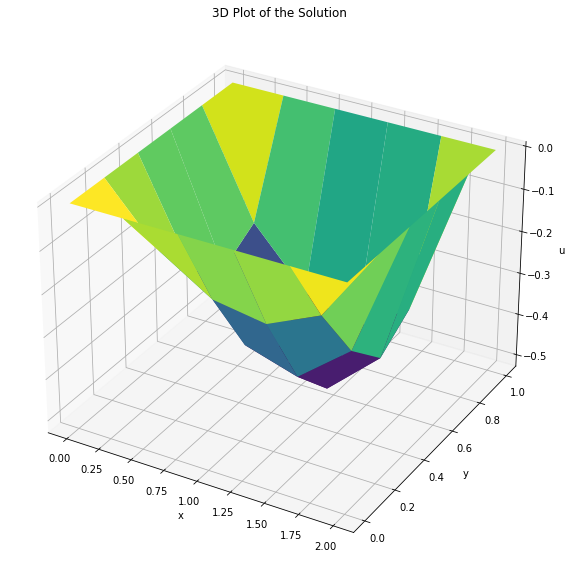

In [166]:

#parameters
N = 6  #number of grid points in x and y directions
dx = 2 / (N - 1)
dy = 1 / (N - 1)

x = np.linspace(0, 2, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

def f(x, y):
    return x * np.exp(y)

#Boundary conditions
u_top = 2 * np.exp(y)
u_bottom = x
u_left = np.zeros(N)
u_right = 2 * np.exp(y)

#Initial guess
u = np.zeros((N, N))

#Finite Difference iteration
max_iter = 1000
tolerance = 1e-6
for _ in range(max_iter):
    u_old = u.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            u[i, j] = (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1] - dx**2 * f(x[i], y[j])) / 4
    if np.allclose(u, u_old, atol=tolerance):
        break

df = pd.DataFrame(u, index=np.round(y, 2), columns=np.round(x, 2))
print("Table:")
print(df)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('3D Plot of the Solution')
plt.show()
